# Лабораторная работа 6. Деревья решений

### Задание 1. Реализовать критерии выбора разбиений.
Необходимо реализовать два критерия выбора разбиений – прироста информации и индекс Джини – и протестировать их на примере датасета из лекции "Состоится ли игра?".

**Задание 1.1.** Создайте датасет "Состоится ли игра?" (вручную или прочитайте из файла):

In [2]:
#  Ваш код здесь
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
df_train = pd.read_excel('data_train.xlsx')
df_train
#df_test = pd.read_excel('data_test.xlsx')
#print(df_test.head())

,Наблюдение,Температура,Влажность,Ветер,Игра
0,Солнце,Жарко,Высокая,Нет,Нет
1,Солнце,Жарко,Высокая,Есть,Нет
2,Облачность,Жарко,Высокая,Нет,Да
3,Дождь,Норма,Высокая,Нет,Да
4,Дождь,Холодно,Норма,Нет,Да
5,Дождь,Холодно,Норма,Есть,Нет
6,Облачность,Холодно,Норма,Есть,Да
7,Солнце,Норма,Высокая,Нет,Нет
8,Солнце,Холодно,Норма,Нет,Да
9,Дождь,Норма,Норма,Нет,Да


**Задание 1.2.** Напишите и протестируйте на примере датасета "Состоится ли игра?" функцию вычисления энтропии (`entropy`):

In [3]:
#  Ваш код здесь
import numpy as np
import math
from scipy.stats import entropy

def entropy(feature):
    p = np.array(feature.value_counts(normalize=True))
    return -np.sum(p * np.log2(p)) 
    
feature = df_train.columns.tolist()[-1]
info =  entropy(df_train[feature])
print('Энтропия:', feature, info)
    

Энтропия: Игра 0.9402859586706311


**Задание 1.3.** Напишите и протестируйте на примере датасета "Состоится ли игра?" функцию  прироста информации (`information_gain`) с использованием функции `entropy`:

In [4]:
#  Ваш код здесь
def information_gain(df, feature, base=None):
    #group = df.groupby([feature])['Игра'].value_counts(normalize=True)
    #print(group)
    n = df['Игра'].count()
    s = entropy(df['Игра'])
    for group in base:
        df_group = df[(df[feature]==group)]
        n_group = df_group['Игра'].count()
        f = df_group.columns.tolist()[-1]
        e = entropy(df_group[f])
        print('Энтропия:', f, group, e)
        s -= n_group/n*e
    return s
    
for feature in df_train.columns.tolist()[:-1]:
    print(feature)
    base = df_train[feature].unique()
    print(base)
    print('Прирост информации ',feature,'= ',information_gain(df_train, feature, base=base),'\n')

Наблюдение
['Солнце' 'Облачность' 'Дождь']
Энтропия: Игра Солнце 0.9709505944546686
Энтропия: Игра Облачность -0.0
Энтропия: Игра Дождь 0.9709505944546686
Прирост информации  Наблюдение =  0.24674981977443933 

Температура
['Жарко' 'Норма' 'Холодно']
Энтропия: Игра Жарко 1.0
Энтропия: Игра Норма 0.9182958340544896
Энтропия: Игра Холодно 0.8112781244591328
Прирост информации  Температура =  0.02922256565895487 

Влажность
['Высокая' 'Норма']
Энтропия: Игра Высокая 0.9852281360342515
Энтропия: Игра Норма 0.5916727785823275
Прирост информации  Влажность =  0.15183550136234164 

Ветер
['Нет' 'Есть']
Энтропия: Игра Нет 0.8112781244591328
Энтропия: Игра Есть 1.0
Прирост информации  Ветер =  0.048127030408269544 



**Задание 1.4.** Напишите и протестируйте на примере датасета "Состоится ли игра?" функцию вычисления индекса Джини (`gini`):

In [5]:
#  Ваш код здесь
def gini(feature):
    p = np.array(feature.value_counts(normalize=True))
    return 1 - np.sum(p ** 2)  

feature = df_train.columns.tolist()[-1]
info =  gini(df_train[feature])
print('Индекс Джини:', feature, info)

Индекс Джини: Игра 0.4591836734693877


In [6]:
def information_gain(df, feature, base=None, criterion='entropy'):
    #group = df.groupby([feature])['Игра'].value_counts(normalize=True)
    #print(group)
    n = df['Игра'].count()
    s = entropy(df['Игра'])
    for group in base:
        df_group = df[(df[feature]==group)]
        n_group = df_group['Игра'].count()
        f = df_group.columns.tolist()[-1]
        if criterion == 'entropy':
            e = entropy(df_group[f])
        else:
            e = gini(df_group[f])
        s -= n_group/n*e
    return s

for feature in df_train.columns.tolist()[:-1]:
    print(feature)
    base = df_train[feature].unique()
    print(base)
    print('Прирост информации ',feature,'= ',information_gain(df_train, feature, base=base, criterion='gini'),'\n')

Наблюдение
['Солнце' 'Облачность' 'Дождь']
Прирост информации  Наблюдение =  0.5974288158134882 

Температура
['Жарко' 'Норма' 'Холодно']
Прирост информации  Температура =  0.49980976819444073 

Влажность
['Высокая' 'Норма']
Прирост информации  Влажность =  0.5729390198951209 

Ветер
['Нет' 'Есть']
Прирост информации  Ветер =  0.5117145300992025 



### Задание 2. Постройте дерево решений (факультативно)

**Задание 2.1.** Для датасета "Состоится ли игра?" постройте дерево решений на основе функции `information_gain`.

In [10]:
#  Ваш код здесь
from collections import defaultdict

# Функция для определения преобладающего класса
def majority_class(data, target_column):
    return data[target_column].value_counts().idxmax()

# Рекурсивная функция для построения дерева решений
def build_decision_tree(data, features, target_column, tree=None):
    if tree is None:
        tree = defaultdict()
    
    # Если все значения целевого признака одинаковы, создаем лист
    if len(data[target_column].unique()) == 1:
        tree['лист'] = data[target_column].iloc[0]
        return tree
    
    # Если больше нет признаков для разбиения, создаем лист с большинственным классом
    if len(features) == 0:
        tree['лист'] = majority_class(data, target_column)
        return tree
    
    # Выбор лучшего признака для разбиения
    best_feature = max(features, key=lambda x: information_gain(data, x, target_column))
    tree[best_feature] = {}
    
    # Разбиение данных по значениям лучшего признака
    for value in data[best_feature].unique():
        subset = data[data[best_feature] == value]
        
        if len(subset) == 0:  # Если подмножество пустое, используем большинство класса
            tree[best_feature][value] = majority_class(data, target_column)
        else:
            tree[best_feature][value] = build_decision_tree(
                subset,
                [f for f in features if f != best_feature],  # Убираем использованный признак
                target_column
            )
    
    return tree

# Построение дерева решений
features = [col for col in df_train.columns if col != 'Игра']
target_column = 'Игра'
decision_tree = build_decision_tree(df_train, features, target_column)

**Задание 2.2.** Визуализируйте построенное дерево (в любом виде):

In [8]:
# Вывод дерева решений
import pprint
pprint.pprint(dict(decision_tree), indent=0.01, width=1, depth=None, compact=True, sort_dicts=False)

{'Наблюдение': {'Солнце': defaultdict(None,
                                    {'Температура': {'Жарко': defaultdict(None,
                                                                        {'лист': 'Нет'}),
                                                   'Норма': defaultdict(None,
                                                                        {'Влажность': {'Высокая': defaultdict(None,
                                                                                                            {'лист': 'Нет'}),
                                                                                     'Норма': defaultdict(None,
                                                                                                          {'лист': 'Да'})}}),
                                                   'Холодно': defaultdict(None,
                                                                          {'лист': 'Да'})}}),
              'Облачность': defaultdict(None,
        

**Задание 2.3.** Сравните полученные результаты с результатами функции из `scikit-learn`:

    Наблюдение  Температура  Влажность  Ветер Игра
0            1            3          1      2  Нет
1            1            3          1      1  Нет
2            2            3          1      2   Да
3            3            2          1      2   Да
4            3            1          2      2   Да
5            3            1          2      1  Нет
6            2            1          2      1   Да
7            1            2          1      2  Нет
8            1            1          2      2   Да
9            3            2          2      2   Да
10           1            2          2      1   Да
11           2            2          1      1   Да
12           2            3          2      2   Да
13           3            2          1      1  Нет


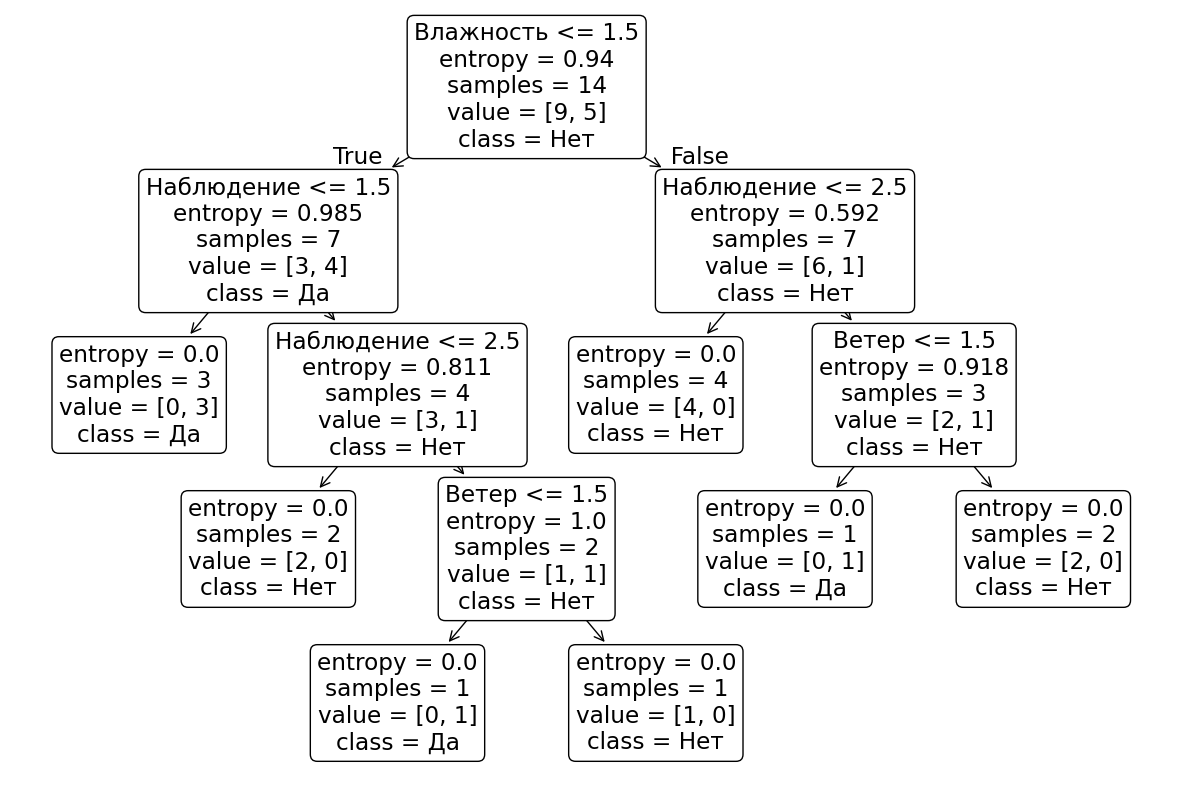

|--- feature_2 <= 1.50
|   |--- feature_0 <= 1.50
|   |   |--- class: Нет
|   |--- feature_0 >  1.50
|   |   |--- feature_0 <= 2.50
|   |   |   |--- class: Да
|   |   |--- feature_0 >  2.50
|   |   |   |--- feature_3 <= 1.50
|   |   |   |   |--- class: Нет
|   |   |   |--- feature_3 >  1.50
|   |   |   |   |--- class: Да
|--- feature_2 >  1.50
|   |--- feature_0 <= 2.50
|   |   |--- class: Да
|   |--- feature_0 >  2.50
|   |   |--- feature_3 <= 1.50
|   |   |   |--- class: Нет
|   |   |--- feature_3 >  1.50
|   |   |   |--- class: Да



In [11]:
#  Ваш код здесь
# #  Ваш код здесь
from sklearn import tree
import matplotlib.pyplot as plt

# Визуализация дерева решений
def plot_decision_tree(model, feature_names, class_names):
    plt.figure(figsize=(15, 10))
    tree.plot_tree(model, filled=False, feature_names=feature_names, class_names=class_names, rounded=True)
    plt.show()

# Преобразование значений признаков к числовому значению 
data = pd.read_excel('data_train.xlsx')
nab = {'Солнце': 1,'Облачность': 2, 'Дождь': 3} 
data['Наблюдение'] = [nab[item] for item in data['Наблюдение']]
nab = {'Холодно': 1,'Норма': 2, 'Жарко': 3} 
data['Температура'] = [nab[item] for item in data['Температура']]
nab = {'Высокая': 1,'Норма': 2} 
data['Влажность'] = [nab[item] for item in data['Влажность']]
nab = {'Есть': 1,'Нет': 2} 
data['Ветер'] = [nab[item] for item in data['Ветер']]
print(data)

# Разделение на признаки и целевую переменную
x=data.iloc[:,:4]
y=data.iloc[:,4:]

# Построение модели
model=tree.DecisionTreeClassifier(criterion="entropy")
model.fit(x, y)

model.score(x, y)

# Пример предсказания на произвольном примере
model.predict([['1','1','2', '1']])

# Визуализация дерева решений
plot_decision_tree(model, ['Наблюдение', 'Температура', 'Влажность', 'Ветер'], ['Нет', 'Да'])

text_representation = tree.export_text(model)
print(text_representation)